## Final Project Submission

Please fill out:
* Student name: Matthew Daly
* Student pace: part time
* Scheduled project review date/time: TBA
* Instructor name: Eli
* Blog post URL:TBA


## Predicting Loan Default Risks - Home Credit Data Set

The data was provided by Home Credit, a lender who provides loans to populations unable to use traditional credit services. The ability to accurately predict default risks is of obvious importance for lenders and this type of task is a great candidate for the application of supervised classification.

## The Data

For the purposes of this project, we will be looking pre-curated training and testings data sets containing information about loans and loan applicants.

The training set includes a TARGET column that indicates whether or not the loan was repaid or ended in default. The data is in the form of CSV files which was collated from seven different sources and includes comprehensive information regarding the applicant's previous credit history, income, employment, education, age, and residence type and location.

Below is a schema of the various data sources used:

![image](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)

## Import Libraries

In [1]:
# data manipullation
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import LabelEncoder

# turn off warnings
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
df = pd.read_csv('application_train.csv')
print('Training Data shape: {}'.format(df.shape))

Training Data shape: (307511, 122)


In the original training data set there are 307,511 loans and 122 features, including the TARGET.

In [3]:
#check first few rows
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## EDA

In [4]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### TARGET Distribution

Text(0.5,0,'O loan repaid - 1 loan dafault')

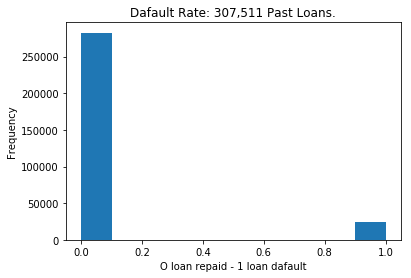

In [6]:
df['TARGET'].astype(int).plot.hist()
plt.title('Dafault Rate: 307,511 Past Loans.')
plt.xlabel('O loan repaid - 1 loan dafault')

The majority of loans are repaid, which though great for Home Credit, does create a Class Imbalance Problem. We might have to address this when implementing ML modeling. 

### Column Types

In [7]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [8]:
#look at number of unique classes per column
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

To use Machine Learning algorithms we will need to encode the categorical data. For the columns with only two categories, we will use label encoding and for those with more,  One-Hot Encoding. 

In [9]:
lb = LabelEncoder()
lb_count = 0

for col in df:
    if df[col].dtype == 'object':
        if len(df[col].unique()) <= 2:
            lb.fit(df[col])
            df[col] = lb.transform(df[col])
            lb_count += 1
            
print(lb_count)

3


In [10]:
df = pd.get_dummies(df)
print('Shape traing data: {}'.format(df.shape))

Shape traing data: (307511, 243)


## Check Data for Outlers, Anomalies and Place Holders 

In brevity's service, I will only include relevant findings. 

In [11]:
df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5,0,'Days Employment')

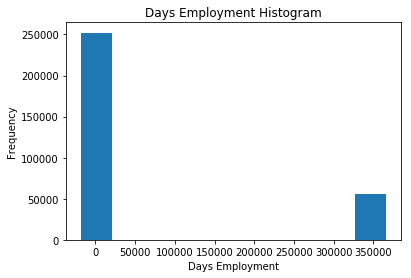

In [12]:
df['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')

There is obviously a problem here - unless some people are working a thousand years. As we don't want to lose any relevant data, let's see the default rate of this subset. 

In [13]:
subset = df[df['DAYS_EMPLOYED'] == 365243]
    
non_subset = df[df['DAYS_EMPLOYED'] != 365243]

print('Subset default rate: {}%'.format(round(100 * subset['TARGET'].mean(), 2)))
print('Normal default rate: {}%'.format(round(100 * non_subset['TARGET'].mean(), 2)))

Subset default rate: 5.4%
Normal default rate: 8.66%


There is a big difference in the default rate between the groups. There might be something in this subset that might prove important as we progress, so we will try to preserve this information. My first instinct is that 365243 is a placeholder.

Text(0.5,0,'Days Employment')

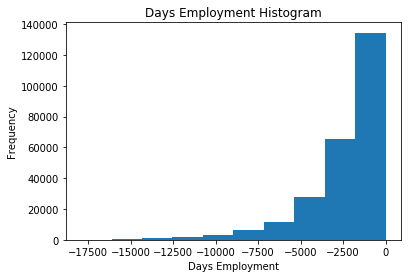

In [14]:
df['DAYS_EMPLOYED_SUBSET'] = df['DAYS_EMPLOYED'] == 365243
df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

df['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')


Ok, that looks better.

## Correlations

Let's take a look at the correlation between the target and the various features. 

In [15]:
corrs = df.corr()['TARGET'].sort_values()

print('Positive Correlations:\n{}\n\n'.format(corrs.tail(15)))

print('Negative Correlations:\n{}'.format(corrs.head(15)))

Positive Correlations:
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64


Negative Correla

On the positive side, DAYS_BIRTH (age), DAYS_EMPLOYED, and REGION_RATING_CLIENT_W_CITY - which is defined as "Our rating of the region where client lives with taking city into account (1,2,3)".

On the negative side, EXT_SOURCE_[3, 2, 1] - defined as 'Normalized score from external data source,normalized', which I take to be credit reporting agency such as Equifax -   have a negative correlation with TARGET. 

Let's visualize that:

Text(0.5,1,'Correlation Heatmap')

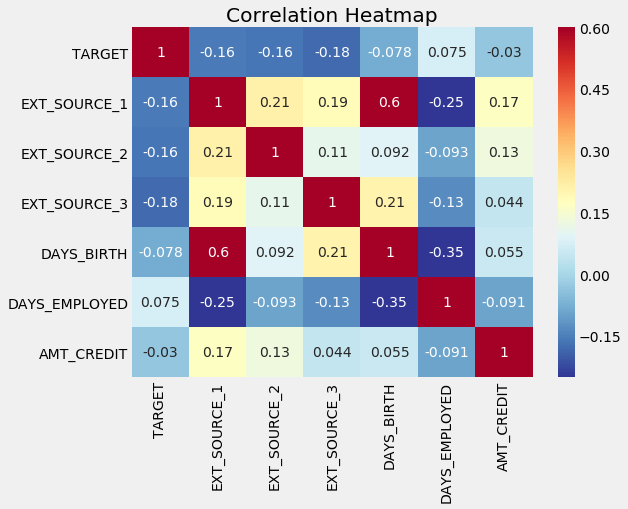

In [19]:
ext_data = df[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_CREDIT']]

ext_data_corrs = ext_data.corr()

plt.figure(figsize=(8, 6))

sns.heatmap(ext_data_corrs, cmap= plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)

plt.title('Correlation Heatmap')

Now let's take a closer look at age as it has the highest correlation with our TARGET.

Text(0,0.5,'Count')

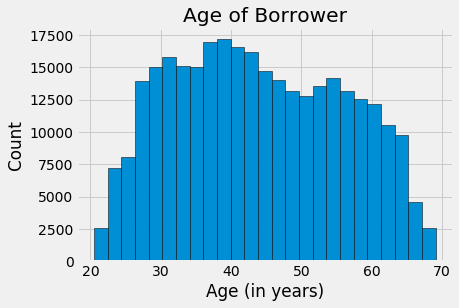

In [20]:
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])

plt.style.use('fivethirtyeight')
plt.hist(df['DAYS_BIRTH']/365, edgecolor='k', bins=25)
plt.title('Age of Borrower')
plt.xlabel('Age (in years)')
plt.ylabel('Count')

Text(0.5,1,'Default Rate by Age')

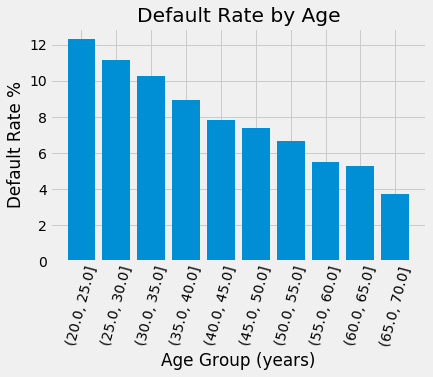

In [21]:
df_age = df[['TARGET', 'DAYS_BIRTH']]
df_age['YEARS_BIRTH'] = df_age['DAYS_BIRTH']/365

df_age['YEARS_BINNED'] = pd.cut(df_age['YEARS_BIRTH'], bins = np.linspace(20, 70, num=11))

age_groups = df_age.groupby('YEARS_BINNED').mean()


plt.figure(figsize=(6,4))
plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'])
plt.xticks(rotation=75)
plt.xlabel('Age Group (years)')
plt.ylabel('Default Rate %')
plt.title('Default Rate by Age')


There is a quite obvious relationship between age and loan repayment within this data set.

## Prepossessing

In [22]:
from sklearn.preprocessing import MinMaxScaler, Imputer
train_label = df['TARGET']

df = df.fillna(df.median())

In [23]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit_transform(df)


array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.80699391e-06, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.61398781e-06, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99994386e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99997193e-01, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

## Modeling

In [24]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['TARGET'])
y = df['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=17)
print(y_train.value_counts(),'\n',y_test.value_counts())

0    226147
1     19861
Name: TARGET, dtype: int64 
 0    56539
1     4964
Name: TARGET, dtype: int64


## PCA

In [21]:
from sklearn.decomposition import PCA
pca_4 = PCA(n_components=20)
principalComponents = pca_4.fit_transform(X)

print(np.sum(pca_4.explained_variance_ratio_))

0.999999999980519


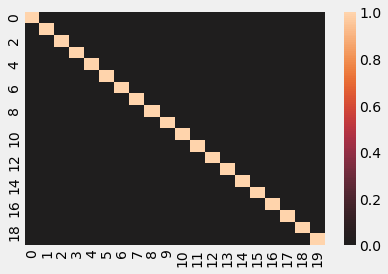

In [22]:
sns.heatmap(pd.DataFrame(principalComponents).corr(), center=0)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)

## LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(C=0.0001, n_jobs = -1, random_state=17)


logreg.fit(X_train, y_train)

train_preds = logreg.predict(X_train)
test_preds = logreg.predict(X_test)


train_accuracy_logreg = accuracy_score(y_train, train_preds)
test_accuracy_logreg = accuracy_score(y_test, test_preds)


print("Logistic Regression")
print("------------------------")
print(f"Training Accuracy: {(train_accuracy_logreg * 100)}%")
print(f"Test Accuracy:     {(test_accuracy_logreg * 100)}%")

score_logReg = ['Logistic Regression', train_accuracy_logreg, test_accuracy_logreg]
models = pd.DataFrame([score_logReg])

Logistic Regression
------------------------
Training Accuracy: 91.92505934766349%
Test Accuracy:     91.92884899923581%


## RandomForest

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier(n_estimators=120, criterion='gini', max_features=9, 
                                max_depth=10, min_samples_split=4, random_state=17, n_jobs=-1)

forest.fit(X_train, y_train)


train_preds = forest.predict(X_train)
test_preds = forest.predict(X_test)


train_accuracy_forest = accuracy_score(y_train, train_preds)
test_accuracy_forest = accuracy_score(y_test, test_preds)


print("Random Forest")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_forest * 100)}%")
print(f"Test Accuracy:     {(test_accuracy_forest * 100)}%")


score_RF = ['Random Forst', train_accuracy_forest, test_accuracy_forest]
models = models.append([score_RF])

Random Forest
-------------------------
Training Accuracy: 91.92709180189263%
Test Accuracy:     91.92884899923581%


## SVM

In [ ]:
# from sklearn import svm

# svm = svm.SVC(kernel='rbf', random_state=17)

# svm.fit(X_train, y_train)

# train_preds = svm.predict(X_train)
# test_preds = svm.predict(X_test)


# train_accuracy_svm = accuracy_score(y_train, train_preds)
# test_accuracy_svm = accuracy_score(y_test, test_preds)


# print("Support Vector Machine")
# print("-------------------------")
# print(f"Training Accuracy: {(train_accuracy_svm * 100)}%")
# print(f"Test Accuracy:     {(test_accuracy_svm * 100)}%")

# score_svm = ['Support Vector Machine', train_accuracy_svm, test_accuracy_svm]
# models = models.append([score_svm])

## XGBoost

In [27]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score


booster2 = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100,
                            colsample_bytree=0.7, gamma=0.1, random_state=17, n_jobs=-1)


booster2.fit(X_train, y_train)


train_preds = booster2.predict(X_train)
test_preds = booster2.predict(X_test)


train_accuracy_booster2 = accuracy_score(y_train, train_preds)
test_accuracy_booster2 = accuracy_score(y_test, test_preds)
report_booster2 = classification_report(y_test, test_preds)

print("XGBoost")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_booster2 * 100)}%")
print(f"Test Accuracy:     {(test_accuracy_booster2 * 100)}%")

score_XGB = ['XGBoost', train_accuracy_booster2, test_accuracy_booster2]
models = models.append([score_XGB])


XGBoost
-------------------------
Training Accuracy: 92.01367435205358%
Test Accuracy:     91.98413085540544%


In [28]:
models

,0,1,2
0,Logistic Regression,0.919251,0.919288
0,Random Forst,0.919271,0.919288
0,XGBoost,0.920137,0.919841


## Conclusions 

XGBoost gives us the best Training/Testing Accuracy and there appears to be little overfitting. Let's look at the feature importance gleamed from  XGBoost. 

Text(0.5,0,'Relative Feature Importance with XGBoost')

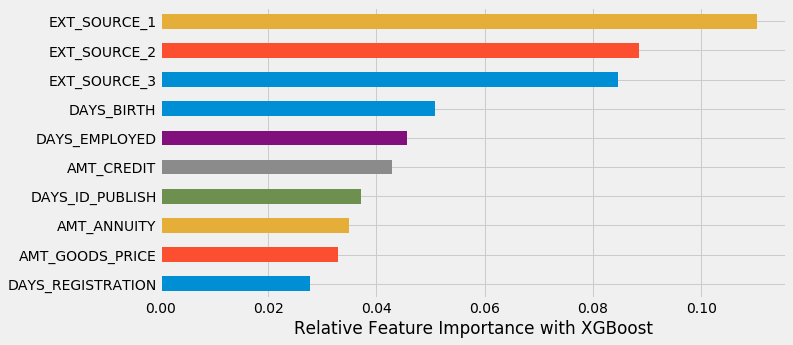

In [32]:
features = df.drop(["TARGET"], axis=1)

target = df[["TARGET"]]

feat_importances = pd.Series(booster2.feature_importances_, index=features.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', figsize=(10,5))
plt.style.use('fivethirtyeight')
plt.xlabel('Relative Feature Importance with XGBoost')

## Recommendations and Future Work

1. As our primary purpose with this project was to glean information that would lower the rate of loan default, it is obvious the EXT_SOURCE_ features have the most impact. 

   They are listed as outside credit agency reports. I feel it would be of great benefit to learn more about their scoring process and implement them within internal risk assessment processes. 
   

2. This is a large data set with many features that may yet have the potential to lower default risk. Spending time and resources on engineering domain-specific data features, ie income vs total debt, length of debt vs length of employment...


3. Fully explore the anomaly in the employment length feature to find out why those with 'place holder' information have such a dramatically lower default rate.  